In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt 

['test.csv', 'train.csv', 'gender_submission.csv']


### Load data from csv

Load the train and test data in 2 dataframes.

Make the `PassengerId` the index of these dataframes.

In [2]:
df_train = pd.read_csv("../input/train.csv")
df_test = pd.read_csv("../input/test.csv")
df_train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Prepare data for the future model.

The idea is to prepare all the data in int64 or float64, that can be ingested by all the machine learning algorithm.

Use the pipeline from `scikit-learn` and `pandas` to do this.

1. Filter all the used features.
2. Find all `NaN` data and transform them in string type 'Not defined'.
3. Labelised all the string/object datatype.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


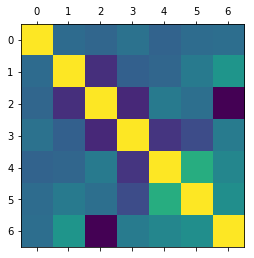

In [5]:
plt.matshow(df_train.corr())

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def transform(df, columns):
    for c in columns:
        le.fit(df[c].values)
        df["%s_label" % c] = le.transform(df[c])
    return df

def prepare_data(df):
    df_prep = df.drop("Name", axis=1)
    
    print("Number of NaN values: %d" % df.isnull().sum().sum())
    df_prep['Cabin'].fillna('not defined', inplace=True)
    df_prep['Age'].fillna(0.0, inplace=True)
    df_prep['Embarked'].fillna('not defined', inplace=True)
    return transform(df_prep, ['Sex', 'Cabin', 'Ticket', 'Embarked'])


df_train_prep = prepare_data(df_train)
df_train_prep.head()

Number of NaN values: 866


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_label,Cabin_label,Ticket_label,Embarked_label
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,not defined,S,1,147,523,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,81,596,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,not defined,S,0,147,669,2
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,55,49,2
4,5,0,3,male,35.0,0,0,373450,8.0500,not defined,S,1,147,472,2


In [7]:
df_train_prep['Cabin'].value_counts()

not defined    687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
E101             3
C22 C26          3
F33              3
F2               3
D20              2
F4               2
C52              2
C65              2
C126             2
E121             2
B5               2
B35              2
E8               2
E67              2
F G73            2
E44              2
C124             2
B58 B60          2
D36              2
D26              2
D33              2
B20              2
D17              2
C78              2
E24              2
              ... 
C49              1
E40              1
B50              1
D15              1
T                1
C47              1
D47              1
E36              1
C110             1
E34              1
C62 C64          1
C148             1
B41              1
C101             1
C106             1
E10              1
D7               1
F E69            1
D10 D12          1
E63              1
B69              1
C103        

### DecisionTree Classifier.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

columns = ['Sex_label', 'Cabin_label', 'Ticket_label', 'Embarked_label', 'Pclass', 'Age']
X = df_train_prep[columns]
y = df_train_prep[['Survived']]

clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)

### Generate output

In [10]:
result = pd.DataFrame()
df_test_prep = prepare_data(df_test)
df_test_prep.head()

X = df_test_prep[columns]
y = clf.predict(X)

result['PassengerId'] = df_test_prep['PassengerId']
result['Survived'] = y

result.head()

result.to_csv('output.csv', header=['PassengerId', 'Survived'])

Number of NaN values: 414
